# **KPMG Data Analytics Virtual Internship**

## Task 1
### Data Quality Assessment

    Assessment of data quality and completeness in preparation for analysis.

#### Here is our task:
Draft an email to the client identifying the data quality issues and strategies to mitigate these issues. Refer to ‘Data Quality Framework Table’ and resources below for criteria and dimensions which you should consider.

Sprocket Central Pty Ltd as the client provided KPMG with 3 datasets:

- Customer Demographic 
- Customer Addresses
- Transactions data in the past 3 months

We decide to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.

#### Data Quality Framework Table
Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. Some of these terms are common to the whole industry, so you may find more information and clarity on these terms by searching online.

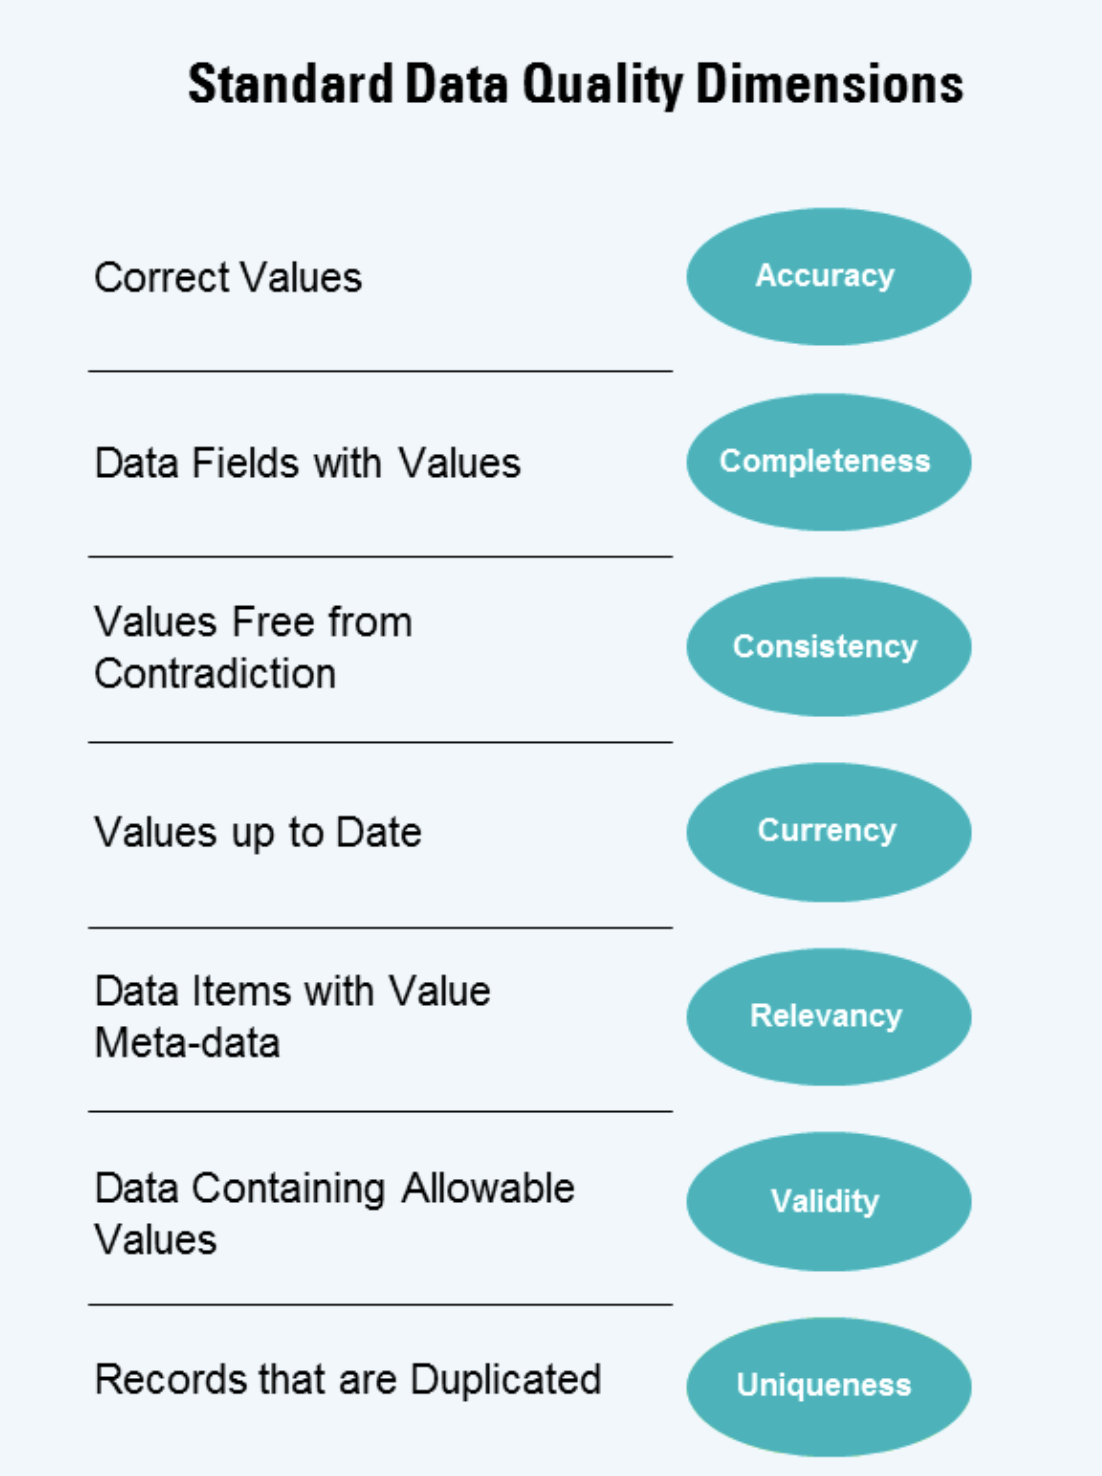

# Data Exploration

## Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.24.2
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


## Read Dataset

#### Required File: The dataset from Sprocket Central
This is the dataset to evaluate for data quality. Read the instructions on the title sheet. There are multiple sheets. [Click to download file →](https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/KPMG_VI_New_raw_data_update_final.xlsx)

_File copyright KPMG. For use for the Virtual Internship Only._

In [4]:
data = pd.ExcelFile('KPMG_Data_Analytics_Virtual_Internship_Dataset.xlsx')

In [5]:
# Read each data separately
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')

In [6]:
# Define function
def missing_values(df):
    total = df.isna().sum()
    percent = round((df.isna().sum() / df.isna().count() * 100), 2)
    na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
    na = na[na['Percentage (%)'] > 0]
    na.reset_index(inplace=True)
    na.rename(columns={'index': 'Feature Name'}, inplace=True)
    return na

def unique_values(df):
    values = {'Feature Name': [], 'Unique Classes': []}
    for col in df.columns:
        values['Feature Name'].append(col)
        values['Unique Classes'].append(df[col].unique())
    return pd.DataFrame(values)

## 1. CustomerDemographic Dataset

In [7]:
# Dimensions of the DataFrame
CustomerDemographic.shape

(4000, 13)

In [8]:
print('Total rows: {}'.format(CustomerDemographic.shape[0]))
print('Total cols: {}'.format(CustomerDemographic.shape[1]))

Total rows: 4000
Total cols: 13


In [9]:
# Data types of the columns
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [10]:
# Display a few rows
CustomerDemographic.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3218,3219,Denyse,Scutts,Female,94,1998-01-06 00:00:00,Web Developer III,Financial Services,Mass Customer,N,100,No,3.0
2007,2008,Jamill,Cudd,Male,77,1993-07-27 00:00:00,Analyst Programmer,Financial Services,Mass Customer,N,1,Yes,3.0
3639,3640,Merralee,Forman,Female,64,1985-04-28 00:00:00,Staff Scientist,NaN,Mass Customer,N,0ï¸â£ 1ï¸â£ 2ï¸â£ 3ï¸â£ 4ï¸â£ 5ï¸â£ 6ï¸â£ 7ï¸â...,No,10.0
2165,2166,Mareah,Woodnutt,Female,78,1984-11-09 00:00:00,Nurse,Property,Mass Customer,N,ð,No,16.0
2300,2301,Ken,Vashchenko,Male,66,1966-10-30 00:00:00,Senior Cost Accountant,Financial Services,Mass Customer,N,00ËÆ$-,Yes,19.0


- The `DOB` column should be converted to datetime format.
- The `owns_car` column should be converted to boolean data type.
- The `tenure` column should be converted from float to int.

In [11]:
# Detect missing value
CustomerDemographic.isna().any()

customer_id                            False
first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
default                                 True
owns_car                               False
tenure                                  True
dtype: bool

In [12]:
# Summarize missing value
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [13]:
missing_values(CustomerDemographic)

,Feature Name,Total,Percentage (%)
0,last_name,125,3.12
1,DOB,87,2.17
2,job_title,506,12.65
3,job_industry_category,656,16.40
4,default,302,7.55
5,tenure,87,2.17


In [14]:
CustomerDemographic.isna().sum().sum()

1763

- There are missing values in the `last_name`, `DOB`, `job_title`, `job_industry_category`, `default`, and `tenure` columns, therefore it is possible to drop or handle them.
- Missing values in the `last_name` column can be filled with values in the `first_name` column.
- Missing values in the `job_title` and `job_industry_category` columns can be filled with certain values.
- Missing values in the `tenure` column can be filled with the median value, because the distribution is not symmetric.
- Columns with missing values less than or equal to 5% can be dropped.

In [15]:
# Detect duplicated value
CustomerDemographic.duplicated().sum()

0

- There are no duplicate values.

### Exploring the columns

In [16]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [17]:
# Number of unique classes
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [18]:
unique_values(CustomerDemographic)

,Feature Name,Unique Classes
0,customer_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,first_name,"[Laraine, Eli, Arlin, Talbot, Sheila-kathryn, ..."
2,last_name,"[Medendorp, Bockman, Dearle, nan, Calton, Duck..."
3,gender,"[F, Male, Female, U, Femal, M]"
4,past_3_years_bike_related_purchases,"[93, 81, 61, 33, 56, 35, 6, 31, 97, 49, 99, 58..."
5,DOB,"[1953-10-12 00:00:00, 1980-12-16 00:00:00, 195..."
6,job_title,"[Executive Secretary, Administrative Officer, ..."
7,job_industry_category,"[Health, Financial Services, Property, IT, nan..."
8,wealth_segment,"[Mass Customer, Affluent Customer, High Net Wo..."
9,deceased_indicator,"[N, Y]"


### Fixing the data quality issues

In [19]:
CustomerDemographic.dropna(subset=['last_name'], inplace=True)
# CustomerDemographic['last_name'].fillna(CustomerDemographic['first_name'], inplace=True)
CustomerDemographic['job_title'].fillna('Unknown', inplace=True)
CustomerDemographic['job_industry_category'].fillna('Unknown', inplace=True)

CustomerDemographic.dropna(subset=['DOB'], inplace=True)
# Convert DOB column to datetime format
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'], errors='coerce')

# Check the minimum and maximum date of birth
print('first', CustomerDemographic['DOB'].min())
print('last', CustomerDemographic['DOB'].max())

first 1843-12-21 00:00:00
last 2002-03-11 00:00:00


In [20]:
CustomerDemographic[CustomerDemographic['DOB'] == '1843-12-21 00:00:00']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


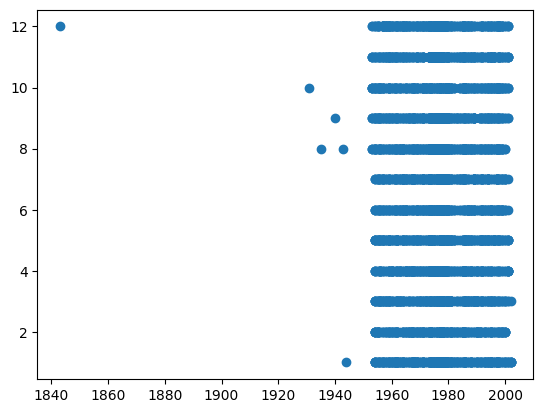

In [21]:
plt.scatter(CustomerDemographic['DOB'].dt.year, CustomerDemographic['DOB'].dt.month)

- The oldest customer (#34, Jephthah Bachmann) was born in 1843, which means his/her age is 180 years, indicating an error in the data.

In [22]:
CustomerDemographic['gender'].value_counts()

gender
Female    1980
Male      1808
F            1
U            1
Femal        1
M            1
Name: count, dtype: int64

- The values in the `gender` column are inconsistent and require replacement with their respective and correct values.

In [23]:
# Renaming the categories
CustomerDemographic['gender'] = CustomerDemographic['gender'].replace({'F'     : 'Female',
                                                                       'Femal' : 'Female',
                                                                       'M'     : 'Male',
                                                                       'U'     : 'Unspecified'})
CustomerDemographic['gender'].value_counts()

gender
Female         1982
Male           1809
Unspecified       1
Name: count, dtype: int64

- The `gender` "Unspecified" has only one value, thus it will be dropped.

In [24]:
CustomerDemographic.drop(CustomerDemographic[CustomerDemographic['gender'] == 'Unspecified'].index, inplace=True)
CustomerDemographic['gender'].value_counts()

gender
Female    1982
Male      1809
Name: count, dtype: int64

In [25]:
CustomerDemographic['default'].value_counts()

default
1                                                                                                                                                                                                                     110
100                                                                                                                                                                                                                   108
-1                                                                                                                                                                                                                    104
-100                                                                                                                                                                                                                   95
â°â´âµâââ                                                                                                               

- Column `default` has inconsistent values, so it can be dropped.

In [26]:
CustomerDemographic = CustomerDemographic.drop('default', axis=1)

In [27]:
CustomerDemographic['owns_car'].value_counts()

owns_car
Yes    1917
No     1874
Name: count, dtype: int64

In [28]:
CustomerDemographic['owns_car'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
CustomerDemographic['owns_car'].value_counts()

owns_car
1    1917
0    1874
Name: count, dtype: int64

In [29]:
CustomerDemographic.dropna(subset=['tenure'], inplace=True)
# CustomerDemographic['tenure'].fillna(CustomerDemographic['tenure'].median(), inplace=True)

# Convert the column to integer
CustomerDemographic['tenure'] = CustomerDemographic['tenure'].astype('int64')
CustomerDemographic['tenure'].sample(n=5, random_state=50)

1784    19
3515    15
1910     3
3931    11
681      7
Name: tenure, dtype: int64

In [30]:
# Data types of the columns
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3791 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3791 non-null   int64         
 1   first_name                           3791 non-null   object        
 2   last_name                            3791 non-null   object        
 3   gender                               3791 non-null   object        
 4   past_3_years_bike_related_purchases  3791 non-null   int64         
 5   DOB                                  3791 non-null   datetime64[ns]
 6   job_title                            3791 non-null   object        
 7   job_industry_category                3791 non-null   object        
 8   wealth_segment                       3791 non-null   object        
 9   deceased_indicator                   3791 non-null   object        
 10  owns_car         

## 2. CustomerAddress Dataset

In [31]:
# Dimensions of the DataFrame
CustomerAddress.shape

(3999, 6)

In [32]:
print('Total rows: {}'.format(CustomerAddress.shape[0]))
print('Total cols: {}'.format(CustomerAddress.shape[1]))

Total rows: 3999
Total cols: 6


In [33]:
# Data types of the columns
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [34]:
# Display a few rows
CustomerAddress.sample(n=5, random_state=50)

,customer_id,address,postcode,state,country,property_valuation
3218,3223,93723 Old Gate Hill,2021,NSW,Australia,9
2007,2012,33 Del Mar Junction,2264,NSW,Australia,8
3638,3643,686 Scoville Drive,3012,VIC,Australia,5
2165,2170,5 Muir Circle,2030,NSW,Australia,12
2300,2305,84 Main Lane,3149,VIC,Australia,10


- The `postcode` column is categorical data, rather than numerical data, so it should be converted to string data type.

In [35]:
# Detect missing value
CustomerAddress.isna().any()

customer_id           False
address               False
postcode              False
state                 False
country               False
property_valuation    False
dtype: bool

In [36]:
# Summarize missing value
CustomerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [37]:
# missing_values(CustomerAddress)

In [38]:
CustomerAddress.isna().sum().sum()

0

- There are no missing values.

In [39]:
# Detect duplicated value
CustomerAddress.duplicated().sum()

0

- There are no duplicate values.

### Exploring the columns

In [40]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [41]:
# Number of unique classes
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [42]:
unique_values(CustomerAddress)

,Feature Name,Unique Classes
0,customer_id,"[1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1..."
1,address,"[060 Morning Avenue, 6 Meadow Vale Court, 0 Ho..."
2,postcode,"[2016, 2153, 4211, 2448, 3216, 2210, 2650, 202..."
3,state,"[New South Wales, QLD, VIC, NSW, Victoria]"
4,country,[Australia]
5,property_valuation,"[10, 9, 4, 12, 8, 6, 7, 3, 5, 11, 1, 2]"


### Fixing the data quality issues

In [43]:
# Convert the column to string
CustomerAddress['postcode'] = CustomerAddress['postcode'].astype(str)

In [44]:
CustomerAddress['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

- `New South Wales` and `Victoria` will be converted to Postal abbreviation.

In [45]:
CustomerAddress['state'] = CustomerAddress['state'].replace({'New South Wales' : 'NSW',
                                                             'Victoria'        : 'VIC'})
CustomerAddress['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [46]:
CustomerAddress['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [47]:
# Data types of the columns
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 187.6+ KB


- It seems that all columns contain accurate and consistent data.

## 3. Transactions Dataset

In [48]:
# Dimensions of the DataFrame
Transactions.shape

(20000, 13)

In [49]:
print('Total rows: {}'.format(Transactions.shape[0]))
print('Total cols: {}'.format(Transactions.shape[1]))

Total rows: 20000
Total cols: 13


In [50]:
# Data types of the columns
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [51]:
# Display a few rows
Transactions.sample(n=5, random_state=50)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7808,7809,80,2205,2017-09-21,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,35455.0
4702,4703,0,1944,2017-04-24,0.0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
8693,8694,46,3116,2017-10-04,NaN,Approved,Solex,Standard,low,medium,1289.85,74.51,39427.0
9085,9086,69,1356,2017-12-08,1.0,Approved,Norco Bicycles,Road,medium,large,1240.31,795.10,40553.0
16689,16690,78,1378,2017-04-26,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,38193.0


- The `online_order` column should have an integer data type.
- The `product_first_sold_date` column should have a datetime data type.

In [52]:
# Detect missing value
Transactions.isna().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order                True
order_status               False
brand                       True
product_line                True
product_class               True
product_size                True
list_price                 False
standard_cost               True
product_first_sold_date     True
dtype: bool

In [53]:
# Summarize missing value
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [54]:
missing_values(Transactions)

,Feature Name,Total,Percentage (%)
0,online_order,360,1.80
1,brand,197,0.98
2,product_line,197,0.98
3,product_class,197,0.98
4,product_size,197,0.98
5,standard_cost,197,0.98
6,product_first_sold_date,197,0.98


In [55]:
Transactions.isna().sum().sum()

1542

- There exist 7 columns with null or missing values that may either be dropped or handled depending on the objective of our analysis.
- Missing values in the `online_order` column can be filled with the mode value.
- Missing values in the `brand`, `product_line`, `product_class`, `product_size`, and `standard_cost` columns can be filled with certain values.
- Columns with missing values less than or equal to 5% can be dropped.

In [56]:
# Detect duplicated value
Transactions.duplicated().sum()

0

- There are no duplicate values, so the data is distinct/unique.

### Exploring the columns

In [57]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [58]:
# Number of unique classes
Transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [59]:
unique_values(Transactions)

,Feature Name,Unique Classes
0,transaction_id,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,product_id,"[2, 3, 37, 88, 78, 25, 22, 15, 67, 12, 5, 61, ..."
2,customer_id,"[2950, 3120, 402, 3135, 787, 2339, 1542, 2459,..."
3,transaction_date,"[2017-02-25 00:00:00, 2017-05-21 00:00:00, 201..."
4,online_order,"[0.0, 1.0, nan]"
5,order_status,"[Approved, Cancelled]"
6,brand,"[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc..."
7,product_line,"[Standard, Road, Mountain, Touring, nan]"
8,product_class,"[medium, low, high, nan]"
9,product_size,"[medium, large, small, nan]"


### Fixing the data quality issues

In [60]:
Transactions.dropna(subset=['online_order'], inplace=True)
# Transactions['online_order'].fillna(Transactions['online_order'].mode()[0], inplace=True)

# Convert the column to integers
Transactions['online_order'] = Transactions['online_order'].astype('int64')
Transactions['online_order'].sample(n=5, random_state=50)

1587     0
3765     0
16599    1
8139     1
13372    0
Name: online_order, dtype: int64

In [61]:
Transactions.dropna(subset=['brand',
                            'product_line',
                            'product_class',
                            'product_size',
                            'standard_cost'],
                    inplace=True)
# Transactions['brand'].fillna('Unknown', inplace=True)
# Transactions['product_line'].fillna('Unknown', inplace=True)
# Transactions['product_class'].fillna('Unknown', inplace=True)
# Transactions['product_size'].fillna('Unknown', inplace=True)
# Transactions['standard_cost'].fillna(0, inplace=True)

In [62]:
Transactions.dropna(subset=['product_first_sold_date'],inplace=True)
Transactions['product_first_sold_date'] = pd.to_datetime(Transactions['product_first_sold_date'], unit='D', origin=pd.Timestamp('1900-01-01'))
Transactions['product_first_sold_date'].sample(n=5, random_state=50)

11142   1991-08-07
15988   2012-06-06
6157    2002-10-12
6900    2003-07-23
13723   2003-09-12
Name: product_first_sold_date, dtype: datetime64[ns]

In [63]:
# Data types of the columns
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  int64         
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 non-nu

## 4. NewCustomerList Dataset

In [64]:
# Dimensions of the DataFrame
NewCustomerList.shape

(1000, 23)

In [65]:
print('Total rows: {}'.format(NewCustomerList.shape[0]))
print('Total cols: {}'.format(NewCustomerList.shape[1]))

Total rows: 1000
Total cols: 23


In [66]:
# Data types of the columns
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

- Drop the unnamed columns that are not useful such as `Unnamed: 16` to `Unnamed: 20`.

In [67]:
# Display a few rows
NewCustomerList.sample(n=5, random_state=50)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
316,Audry,Fann,Female,3,1957-10-17,Pharmacist,Health,Mass Customer,N,Yes,15,19 Debs Parkway,3029,VIC,Australia,6,0.72,0.9000,0.900000,0.765000,312,312,1.0200
459,Gregorius,Leal,Male,7,1951-04-29,NaN,Retail,Affluent Customer,N,Yes,21,66 Merry Court,2033,NSW,Australia,12,0.53,0.6625,0.828125,0.828125,455,455,0.8925
854,Maurine,Clee,Female,45,1980-09-13,Automation Specialist II,Property,High Net Worth,N,Yes,5,6 Maple Plaza,2042,NSW,Australia,10,0.76,0.9500,1.187500,1.187500,854,854,0.5610
11,Wheeler,Winward,Male,48,1999-08-30,Environmental Specialist,Manufacturing,Mass Customer,N,No,10,3 Golden Leaf Point,3216,VIC,Australia,8,0.73,0.7300,0.730000,0.620500,12,12,1.6250
978,Artemis,Swanson,Male,77,1977-02-12,Web Designer II,Argiculture,Mass Customer,N,Yes,13,5 Melvin Park,3810,VIC,Australia,5,0.96,1.2000,1.200000,1.020000,979,979,0.4165


- The `DOB` column should have a datetime data type.
- The `owns_car` column should be converted to boolean data type.
- The `postcode` column is categorical data, rather than numerical data, so it should be converted to string data type.

In [68]:
# Detect missing value
NewCustomerList.isna().any()

first_name                             False
last_name                               True
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                     True
job_title                               True
job_industry_category                   True
wealth_segment                         False
deceased_indicator                     False
owns_car                               False
tenure                                 False
address                                False
postcode                               False
state                                  False
country                                False
property_valuation                     False
Unnamed: 16                            False
Unnamed: 17                            False
Unnamed: 18                            False
Unnamed: 19                            False
Unnamed: 20                            False
Rank                                   False
Value     

In [69]:
# Summarize missing value
NewCustomerList.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [70]:
missing_values(NewCustomerList)

,Feature Name,Total,Percentage (%)
0,last_name,29,2.9
1,DOB,17,1.7
2,job_title,106,10.6
3,job_industry_category,165,16.5


In [71]:
NewCustomerList.isna().sum().sum()

317

- There are missing values in the `last_name`, `DOB`, `job_title`, and `job_industry_category` columns, so they can be dropped or handled.
- Missing values in the `last_name` column can be filled with values in the `first_name` column.
- Missing values in the `job_title` and `job_industry_category` columns can be filled with certain values.
- Columns with missing values less than or equal to 5% can be dropped.

In [72]:
# Detect duplicated value
NewCustomerList.duplicated().sum()

0

- There are no duplicate values.

### Exploring the columns

In [73]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [74]:
# Number of unique classes
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             187
Unnamed: 19                             321
Unnamed: 20                             324
Rank                                    324
Value                           

In [75]:
unique_values(NewCustomerList)

,Feature Name,Unique Classes
0,first_name,"[Chickie, Morly, Ardelis, Lucine, Melinda, Dru..."
1,last_name,"[Brister, Genery, Forrester, Stutt, Hadlee, Br..."
2,gender,"[Male, Female, U]"
3,past_3_years_bike_related_purchases,"[86, 69, 10, 64, 34, 39, 23, 74, 50, 72, 94, 4..."
4,DOB,"[1957-07-12, 1970-03-22, 1974-08-28 00:00:00, ..."
5,job_title,"[General Manager, Structural Engineer, Senior ..."
6,job_industry_category,"[Manufacturing, Property, Financial Services, ..."
7,wealth_segment,"[Mass Customer, Affluent Customer, High Net Wo..."
8,deceased_indicator,[N]
9,owns_car,"[Yes, No]"


### Fixing the data quality issues

In [76]:
# Drop the unnamed columns
NewCustomerList.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True)

In [77]:
# NewCustomerList.dropna(subset=['last_name'], inplace=True)
NewCustomerList['last_name'].fillna(NewCustomerList['first_name'], inplace=True)
NewCustomerList['job_title'].fillna('Unknown', inplace=True)
NewCustomerList['job_industry_category'].fillna('Unknown', inplace=True)

In [78]:
NewCustomerList['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [79]:
NewCustomerList[NewCustomerList['gender'] == 'U'].reset_index()

,index,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
1,226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
2,324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
3,358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
4,360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
5,374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
6,434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
7,439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
8,574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
9,598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


- There are 17 rows where the gender is not specified.
- All customers with unspecified gender have none date of birth (DOB) data.

In [80]:
NewCustomerList['gender'] = NewCustomerList['gender'].replace('U', 'Unspecified')
NewCustomerList['gender'].value_counts()

gender
Female         513
Male           470
Unspecified     17
Name: count, dtype: int64

In [81]:
NewCustomerList.dropna(subset=['DOB'], inplace=True)

# Convert DOB column to datetime format
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'], errors='coerce')

# Check the minimum and maximum date of birth
print('first', NewCustomerList['DOB'].min())
print('last', NewCustomerList['DOB'].max())

first 1938-06-08 00:00:00
last 2002-02-27 00:00:00


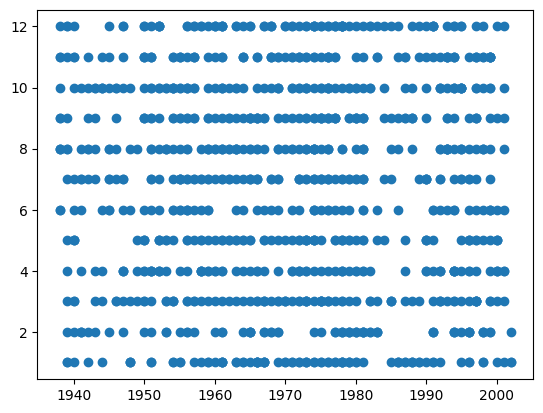

In [82]:
plt.scatter(NewCustomerList['DOB'].dt.year, NewCustomerList['DOB'].dt.month)

- The youngest customer was born in 2002, while the oldest was born in 1938.

In [83]:
for col in NewCustomerList.columns[6:10]:    
    print(NewCustomerList[col].value_counts())
    print()

job_industry_category
Financial Services    202
Manufacturing         199
Unknown               165
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

deceased_indicator
N    983
Name: count, dtype: int64

owns_car
No     497
Yes    486
Name: count, dtype: int64



In [84]:
NewCustomerList['owns_car'].replace({'Yes' : 1, 'No' : 0}, inplace=True)
NewCustomerList['owns_car'].value_counts()

owns_car
0    497
1    486
Name: count, dtype: int64

In [85]:
# Convert the column to string
NewCustomerList['postcode'] = NewCustomerList['postcode'].astype(str)

In [86]:
NewCustomerList['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [87]:
NewCustomerList['country'].value_counts()

country
Australia    983
Name: count, dtype: int64

In [88]:
# Data types of the columns
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           983 non-null    object        
 1   last_name                            983 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  983 non-null    int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            983 non-null    object        
 6   job_industry_category                983 non-null    object        
 7   wealth_segment                       983 non-null    object        
 8   deceased_indicator                   983 non-null    object        
 9   owns_car                             983 non-null    int64         
 10  tenure             

## Merge all customer information

- Since both datasets have identical customer information, it is recommended to merge them into a single table for our analysis.

In [89]:
print(f'Total entries in CustomerDemographic table : {CustomerDemographic.shape[0]}')
print(f'Total entries in CustomerAddress table     : {CustomerAddress.shape[0]}')
print(f'Total entries in Transactions table        : {Transactions.shape[0]}')
print(f'Total entries in NewCustomerList table     : {NewCustomerList.shape[0]}')

Total entries in CustomerDemographic table : 3791
Total entries in CustomerAddress table     : 3999
Total entries in Transactions table        : 19445
Total entries in NewCustomerList table     : 983


In [90]:
NewCustomerList.insert(0, 'customer_id', range(4001, 4001 + len(NewCustomerList)))
NewCustomerList.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
523,4516,Bailey,Bereford,Male,44,1950-09-30,Senior Sales Associate,Argiculture,Affluent Customer,N,1,11,36 Golf Course Circle,2444,NSW,Australia,6,524,0.836719
281,4280,Verla,Dumingos,Female,26,1971-09-18,Design Engineer,Telecommunications,Mass Customer,N,1,10,6784 Spohn Alley,3021,VIC,Australia,8,282,1.049219
559,4552,Charlie,Dmych,Male,60,1950-03-31,Account Coordinator,Manufacturing,High Net Worth,N,0,13,920 Cambridge Way,2263,NSW,Australia,6,555,0.812500
128,4128,Georgetta,Lovett,Female,42,1940-02-02,Editor,Retail,Mass Customer,N,0,12,1 Bluejay Place,4405,QLD,Australia,1,127,1.250000
518,4511,Maddalena,Angood,Female,79,1999-07-28,Unknown,Manufacturing,Affluent Customer,N,0,12,1 Bluejay Court,2320,NSW,Australia,4,515,0.839375


- In order to vertically merge the tables, we need to insert `customer_id` column in the `NewCustomerList` table.

In [91]:
OldCustomerList = pd.merge(CustomerDemographic, CustomerAddress, how='left', on='customer_id')
OldCustomerList.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
1694,1785,Marty,Whatford,Male,23,1960-12-10,Clinical Specialist,Health,Mass Customer,N,0,19,30 Delladonna Plaza,3046,VIC,Australia,8.0
3327,3516,Diarmid,Vearnals,Male,93,1977-04-30,Unknown,Property,Mass Customer,N,1,15,16 Vahlen Trail,2152,NSW,Australia,10.0
1816,1911,Hallsy,De Leek,Male,22,1980-06-08,Director of Sales,Manufacturing,Mass Customer,N,0,3,2 Maryland Drive,4227,QLD,Australia,7.0
3726,3932,Hadley,Veracruysse,Male,85,1986-07-10,Senior Editor,Financial Services,Mass Customer,N,0,11,60272 Montana Drive,2223,NSW,Australia,8.0
648,682,Ole,Euplate,Male,53,1971-03-16,Health Coach IV,Health,Affluent Customer,N,1,7,3 Sheridan Park,2548,NSW,Australia,8.0


- We need to merge the `CustomerDemographic` with the `CustomerAddress` table before we concatenate with the `NewCustomerList` table.

In [92]:
AllCustomerList = pd.concat([OldCustomerList, NewCustomerList], ignore_index=True, sort=False)
AllCustomerList.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
4149,4359,Kenneth,Elleyne,Male,13,1957-09-03,Technical Writer,Financial Services,Mass Customer,N,0,13,27429 Dottie Plaza,3145,VIC,Australia,11.0,361.0,0.9775
1187,1252,Les,Ellwood,Male,46,1965-01-16,Recruiting Manager,Manufacturing,Mass Customer,N,1,14,60320 Emmet Road,4806,QLD,Australia,4.0,NaN,NaN
271,286,Kiley,Canaan,Male,99,1989-08-01,Accounting Assistant II,Manufacturing,Affluent Customer,N,1,11,747 Thackeray Circle,4551,QLD,Australia,7.0,NaN,NaN
598,628,Mallissa,Gillespie,Female,14,1981-10-24,Actuary,Financial Services,Mass Customer,N,0,13,4744 Garrison Drive,4132,QLD,Australia,4.0,NaN,NaN
2323,2446,Lovell,Kiss,Male,33,1956-09-07,Unknown,Retail,Affluent Customer,N,0,17,047 Kedzie Park,2206,NSW,Australia,11.0,NaN,NaN


In [93]:
print(f'Total entries in NewCustomerList table : {NewCustomerList.shape[0]}')
print(f'Total entries in OldCustomerList table : {OldCustomerList.shape[0]}')
print(f'Total entries in AllCustomerList table : {AllCustomerList.shape[0]}')

Total entries in NewCustomerList table : 983
Total entries in OldCustomerList table : 3791
Total entries in AllCustomerList table : 4774


In [94]:
AllCustomerList.duplicated().sum()

0

In [95]:
AllCustomerList.isna().sum()

customer_id                               0
first_name                                0
last_name                                 0
gender                                    0
past_3_years_bike_related_purchases       0
DOB                                       0
job_title                                 0
job_industry_category                     0
wealth_segment                            0
deceased_indicator                        0
owns_car                                  0
tenure                                    0
address                                   4
postcode                                  4
state                                     4
country                                   4
property_valuation                        4
Rank                                   3791
Value                                  3791
dtype: int64

In [96]:
# Drop missing values from multiple columns
AllCustomerList.dropna(subset=['address',
                               'postcode',
                               'state',
                               'country',
                               'property_valuation'],
                       inplace=True)

# Drop multiple columns
AllCustomerList.drop(columns=['Rank', 'Value'],
                     inplace=True)

In [97]:
AllCustomerList.isna().sum().sum()

0

### Checking the features

In [98]:
# Before converting
before = AllCustomerList.dtypes

# Change multiple columns dtype: object to category
df_object = AllCustomerList.select_dtypes(include = ['object']).copy()
for col in df_object.columns:
    AllCustomerList[col] = AllCustomerList[col].astype('category')

# Change column dtype: float to integer
AllCustomerList['property_valuation'] = AllCustomerList['property_valuation'].astype('int64')

# Replace values in the 'deceased_indicator' column
AllCustomerList['deceased_indicator'].replace({'N': 0, 'Y': 1}, inplace=True)

# After converting
after = AllCustomerList.dtypes

print(f'Before converting:\n{before}\n')
print(f'After converting:\n{after}\n')

Before converting:
customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                        int64
tenure                                          int64
address                                        object
postcode                                       object
state                                          object
country                                        object
property_valuation                            float64
dtype: object

After converting:
customer_id                   

In [99]:
AllCustomerList.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
3653,3854,Melody,Ivanilov,Female,47,1996-01-16,VP Quality Control,Property,High Net Worth,0,1,2,341 Katie Junction,4817,QLD,Australia,4
3848,4058,Marylou,Kirkup,Female,51,1972-10-31,VP Product Management,Unknown,Mass Customer,0,0,14,76733 Sunbrook Terrace,3196,VIC,Australia,9
2918,3072,Roma,Prettjohn,Male,87,1979-04-12,Chemical Engineer,Manufacturing,Mass Customer,0,1,10,6269 Oak Valley Avenue,2323,NSW,Australia,5
84,88,Malynda,Tumber,Female,41,1966-02-03,Help Desk Operator,Property,High Net Worth,0,1,7,5 Grim Center,2069,NSW,Australia,12
1231,1298,Guglielmo,Yele,Male,35,1974-04-06,Research Nurse,Health,Mass Customer,0,0,16,029 Scott Center,4205,QLD,Australia,5


In [100]:
AllCustomerList['age'] = (dt.datetime.now() - AllCustomerList['DOB']) / np.timedelta64(1, 'Y')
AllCustomerList['age'] = AllCustomerList['age'].astype(int)
AllCustomerList['age_class'] = ((round(AllCustomerList['age'] / 10)) * 10).astype(int)
AllCustomerList.sample(n=5, random_state=50)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age,age_class
3653,3854,Melody,Ivanilov,Female,47,1996-01-16,VP Quality Control,Property,High Net Worth,0,1,2,341 Katie Junction,4817,QLD,Australia,4,27,30
3848,4058,Marylou,Kirkup,Female,51,1972-10-31,VP Product Management,Unknown,Mass Customer,0,0,14,76733 Sunbrook Terrace,3196,VIC,Australia,9,50,50
2918,3072,Roma,Prettjohn,Male,87,1979-04-12,Chemical Engineer,Manufacturing,Mass Customer,0,1,10,6269 Oak Valley Avenue,2323,NSW,Australia,5,44,40
84,88,Malynda,Tumber,Female,41,1966-02-03,Help Desk Operator,Property,High Net Worth,0,1,7,5 Grim Center,2069,NSW,Australia,12,57,60
1231,1298,Guglielmo,Yele,Male,35,1974-04-06,Research Nurse,Health,Mass Customer,0,0,16,029 Scott Center,4205,QLD,Australia,5,49,50


### Export the AllCustomerList dataset

In [101]:
# Export dataset to a csv file
# AllCustomerList.to_csv('AllCustomerList.csv', index=False)

# Export dataset to a xlsx file
AllCustomerList.to_excel('AllCustomerList.xlsx', index=False)

## Transactions Dataset

In [102]:
# Display a few rows
Transactions.sample(n=5, random_state=50)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
11142,11143,25,316,2017-12-19,0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1991-08-07
15988,15989,49,3098,2017-07-03,0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-06
6157,6158,96,392,2017-02-22,0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-12
6900,6901,55,460,2017-10-15,0,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,2003-07-23
13723,13724,95,1514,2017-02-11,0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,2003-09-12


In [103]:
most_recent_purchase = Transactions['transaction_date'].max()
Transactions['last_purchase_days_ago'] = most_recent_purchase - Transactions['transaction_date']
Transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
Transactions['last_purchase_days_ago'] = Transactions['last_purchase_days_ago'].astype('int64')
Transactions['profit'] = Transactions['list_price'] - Transactions['standard_cost']
Transactions.sample(n=5, random_state=50)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
11142,11143,25,316,2017-12-19,0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,1991-08-07,11,709.34
15988,15989,49,3098,2017-07-03,0,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-06,180,133.38
6157,6158,96,392,2017-02-22,0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-12,311,129.01
6900,6901,55,460,2017-10-15,0,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,2003-07-23,76,1295.43
13723,13724,95,1514,2017-02-11,0,Approved,Giant Bicycles,Standard,medium,large,569.56,528.43,2003-09-12,322,41.13


In [104]:
Transactions[Transactions['last_purchase_days_ago'] > 365].shape

(0, 15)

In [105]:
rfmTable = Transactions.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

rfmTable.sample(n=5, random_state=50)

,recency,frequency,monetary_value
customer_id,,,
944,133,7,1934.04
2203,49,5,3469.05
3088,3,7,2487.23
644,157,3,550.00
2616,42,11,6417.95


In [106]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,18.0,4.0,1797.43
0.50,45.0,5.0,2798.99
0.75,88.0,7.0,4122.44


In [107]:
# Define functions of RFM OneHotEncoder
def r_OHE(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 4
    
def fm_OHE(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else: 
        return 1

In [108]:
rfmSegment = rfmTable
rfmSegment['r_score'] = rfmSegment['recency'].apply(r_OHE, args=('recency', quartiles))
rfmSegment['f_score'] = rfmSegment['frequency'].apply(fm_OHE, args=('frequency', quartiles))
rfmSegment['m_score'] = rfmSegment['monetary_value'].apply(fm_OHE, args=('monetary_value', quartiles))
rfmSegment.sample(n=5, random_state=50)

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
944,133,7,1934.04,4,3,2
2203,49,5,3469.05,3,2,3
3088,3,7,2487.23,1,3,2
644,157,3,550.00,4,4,4
2616,42,11,6417.95,2,1,1


In [109]:
rfmSegment['rfm_class'] = 100 * rfmSegment['r_score'] + 10 * rfmSegment['f_score'] + rfmSegment['m_score']
rfmSegment['total_score'] = rfmSegment['r_score'] + rfmSegment['f_score'] + rfmSegment['m_score']
rfmSegment.sample(n=5, random_state=50)

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score
customer_id,,,,,,,,
944,133,7,1934.04,4,3,2,432,9
2203,49,5,3469.05,3,2,3,323,8
3088,3,7,2487.23,1,3,2,132,6
644,157,3,550.00,4,4,4,444,12
2616,42,11,6417.95,2,1,1,211,4


In [110]:
rfm_quartiles = rfmSegment['rfm_class'].quantile(q=[0, 0.25, 0.5, 0.75, 1]).values
rfm_quartiles

array([111., 144., 244., 344., 444.])

In [111]:
# Define function of RFM Class OneHotEncoder
def rfm_class_OHE(x, p, d):
    if x <= d[0]:
        return 'Platinum'
    elif x <= d[1]:
        return 'Gold'
    elif x <= d[2]: 
        return 'Silver'
    else: 
        return 'Classic'

rfmSegment['customer_level'] = rfmSegment['rfm_class'].apply(rfm_class_OHE, args=('rfm_class', rfm_quartiles))
rfmSegment.sample(n=5, random_state=50)

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_class,total_score,customer_level
customer_id,,,,,,,,,
944,133,7,1934.04,4,3,2,432,9,Classic
2203,49,5,3469.05,3,2,3,323,8,Classic
3088,3,7,2487.23,1,3,2,132,6,Gold
644,157,3,550.00,4,4,4,444,12,Classic
2616,42,11,6417.95,2,1,1,211,4,Silver


In [112]:
OldCustomerList.shape

(3791, 17)

In [113]:
OldCustomerList = OldCustomerList.dropna()
OldCustomerList.shape

(3787, 17)

In [114]:
Transactions['customer_id'].describe()

count    19445.000000
mean      1739.467267
std       1011.889153
min          1.000000
25%        857.000000
50%       1741.000000
75%       2615.000000
max       5034.000000
Name: customer_id, dtype: float64

In [115]:
Transactions[Transactions['customer_id'] > 4000]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
8707,8708,0,5034,2017-10-07,0,Approved,Solex,Road,medium,medium,416.98,312.735016,2015-08-04,84,104.244984
16700,16701,0,5034,2017-01-27,0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,1997-08-27,337,90.100012
17468,17469,0,5034,2017-01-03,0,Approved,OHM Cycles,Road,medium,medium,742.54,667.400024,1992-10-04,361,75.139976
